# Projeto 2 - O paciente tem diabete?

<img src="https://static.tuasaude.com/media/article/dr/nj/diabetes_52276_l.jpg" width="400" height="100"/>

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset3.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [11]:
total = df.groupby('Outcome').agg(n = ('Outcome','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [12]:
total

,Outcome,n,perc
0,0,500,65.104167
1,1,268,34.895833


## Ver se tem valores fora do padrão
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img3.png?raw=true" width="300" height="100"/>

## Separar em target e feature

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="300" height="100"/>

In [13]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

## Tratar variáveis categóricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img7.png?raw=true" width="600" height="100"/>

In [15]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan),
                                    MinMaxScaler())

In [16]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['Pregnancies',
                               'Glucose',
                               'BloodPressure',
                               'SkinThickness',
                               'Insulin',
                               'BMI',
                               'DiabetesPedigreeFunction',
                               'Age']))

In [17]:
pd.DataFrame(preprocessor.fit_transform(X))

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [18]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000)).fit(X_train, y_train)
LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis()).fit(X_train, y_train)
DT = make_pipeline(preprocessor,DecisionTreeClassifier()).fit(X_train, y_train)
KN = make_pipeline(preprocessor,KNeighborsClassifier()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor,SVC(probability=True)).fit(X_train,y_train) 
RF = make_pipeline(preprocessor,RandomForestClassifier()).fit(X_train,y_train) 

## Acurácia do Treino

In [19]:
print("Acurácia treino LR:", LR.score(X_train,y_train), "\n")
print("Acurácia treino LDA:", LDA.score(X_train,y_train), "\n")
print("Acurácia treino DT:", DT.score(X_train,y_train), "\n")
print("Acurácia treino KN:", KN.score(X_train,y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train,y_train), "\n")
print("Acurácia treino RF:", RF.score(X_train,y_train), "\n")

Acurácia treino LR: 0.7665369649805448 

Acurácia treino LDA: 0.7782101167315175 

Acurácia treino DT: 1.0 

Acurácia treino KN: 0.8365758754863813 

Acurácia treino SVM: 0.7976653696498055 

Acurácia treino RF: 1.0 



## Matriz de confusão + Métricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img14.png?raw=true" width="350" height="100"/>

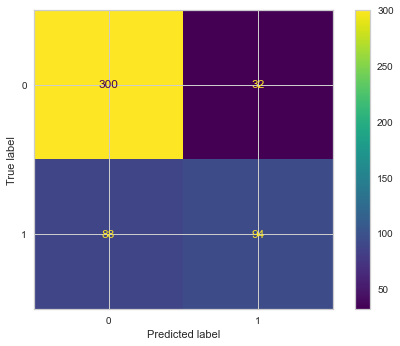

In [20]:
ConfusionMatrixDisplay.from_estimator(LR, X_train,y_train)
plt.show()

## Acurácia, Precision e Recall do Treino

In [21]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          LDA.score(X_train,y_train),
                          DT.score(X_train,y_train),
                          KN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 0),
                          precision_score(y_train, LDA.predict(X_train), pos_label = 0),
                          precision_score(y_train, DT.predict(X_train), pos_label = 0),
                          precision_score(y_train, KN.predict(X_train), pos_label = 0),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 0),
                          precision_score(y_train, RF.predict(X_train), pos_label = 0)],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 0),
                          recall_score(y_train, LDA.predict(X_train), pos_label = 0),
                          recall_score(y_train, DT.predict(X_train), pos_label = 0),
                          recall_score(y_train, KN.predict(X_train), pos_label = 0),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 0),
                          recall_score(y_train, RF.predict(X_train), pos_label = 0)]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.766537,0.773196,1.000000
LDA,0.778210,0.793011,0.888554
DT,1.000000,1.000000,1.000000
KN,0.836576,0.840659,0.921687
SVM,0.797665,0.808108,0.900602
RF,1.000000,1.000000,1.000000


## Curva ROC
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img15.png?raw=true" width="350" height="200"/>

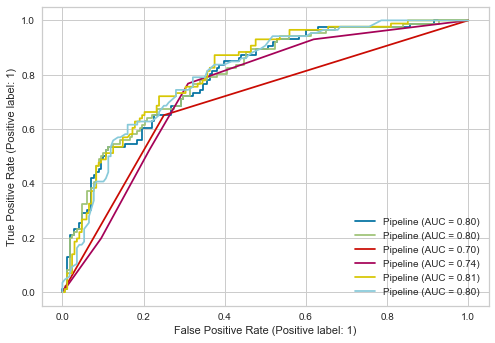

In [22]:
RocCurveDisplay.from_estimator(LR, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(DT, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(KN, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(SVM, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(RF, X_test, y_test,drop_intermediate=False,ax=plt.gca())

plt.show()